In [1]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)


In [2]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

In [3]:
print(test_data)

[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717])
 list([1, 14, 22, 2, 6, 176, 7, 2, 88, 12, 2, 23, 2, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 2, 2, 4, 2, 2, 109, 2, 21, 4, 22, 2, 8, 6, 2, 2, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 2, 5, 2, 2, 45, 55, 221, 15, 670, 2, 526, 14, 2, 4, 405, 5, 2, 7, 27, 85, 108, 131, 4, 2, 2, 2, 405, 9, 2, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 2, 2, 45, 407, 31, 7, 41, 2, 105, 21, 59, 299, 12, 38, 950, 5, 2, 15, 45, 629, 488, 2, 127, 6, 52, 292, 17, 4, 2, 185, 132, 2, 2, 2, 488, 2, 47, 6, 392, 173, 4, 2, 2, 270, 2, 4, 2, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 976, 2, 7, 2, 861, 2, 5, 2, 30, 2, 2, 56, 4, 841, 5, 990, 692, 8, 4, 2, 398, 229, 10, 10, 13, 2, 6

In [4]:
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)


In [5]:
def build_model():
    # 드롭아웃을 적용하지 않은 신경망 모델 구축
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_model_with_early_stopping(model, train_data, train_labels, test_data, test_labels):
    # 조기 종료 콜백 정의
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    # 신경망 훈련, 검증 데이터 전달
    history = model.fit(train_data,
                        train_labels,
                        epochs=20,
                        batch_size=512,
                        validation_data=(test_data, test_labels),
                        callbacks=[early_stopping],
                        verbose=2)
    return history

In [6]:
def plot_loss(history):
    # 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
    history_dict = history.history
    loss_values = history_dict['loss']       # 훈련 데이터 손실값
    val_loss_values = history_dict['val_loss']   # 검증 데이터 손실값
    acc = history_dict['accuracy']          # 정확도
    epochs = range(1, len(acc) + 1)        # 에포크 수

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Plot')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train error', 'val error'], loc='upper left')
    plt.show()

In [7]:
model = build_model()


In [8]:
history_with_early_stopping = train_model_with_early_stopping(model, train_data, train_labels, test_data, test_labels)


Epoch 1/20
49/49 - 3s - loss: 0.5638 - accuracy: 0.7188 - val_loss: 0.4283 - val_accuracy: 0.8165 - 3s/epoch - 52ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3660 - accuracy: 0.8496 - val_loss: 0.3441 - val_accuracy: 0.8544 - 464ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3229 - accuracy: 0.8672 - val_loss: 0.3338 - val_accuracy: 0.8587 - 454ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3117 - accuracy: 0.8709 - val_loss: 0.3294 - val_accuracy: 0.8596 - 456ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3047 - accuracy: 0.8749 - val_loss: 0.3275 - val_accuracy: 0.8600 - 459ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2979 - accuracy: 0.8758 - val_loss: 0.3283 - val_accuracy: 0.8602 - 477ms/epoch - 10ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2926 - accuracy: 0.8794 - val_loss: 0.3279 - val_accuracy: 0.8587 - 459ms/epoch - 9ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2882 - accuracy: 0.8814 - val_loss: 0.3297 - val_accuracy: 0.8600 - 446ms/epoch - 9ms/step


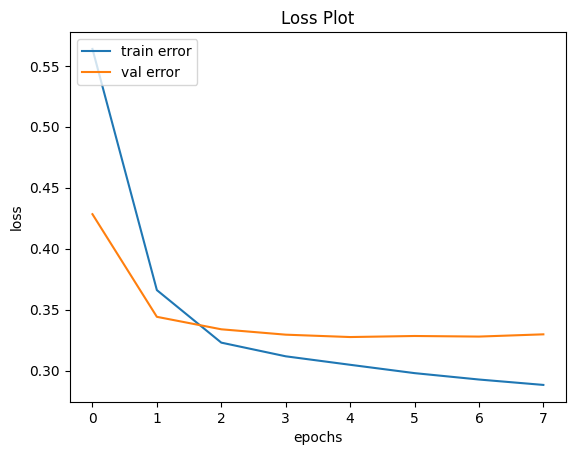

In [9]:
plot_loss(history_with_early_stopping)
